In [1]:
import pandas as pd 

In [2]:
df_china = pd.read_csv('data/primer_hackathon_data_china.csv')

In [3]:
df_china.describe()

,Source Name,Date,Original URL,Title,Content
count,33101,33101,33099,33101,33101
unique,20,27097,33098,29079,29548
top,XINHUA English,2023-06-26T02:04:18Z,https://www.globaltimes.cn/page/202301/1283224...,Briefly,"BEIJING, June 26 (Xinhua) -- The following are..."
freq,5971,33,2,36,33


In [4]:
df_china.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33101 entries, 0 to 33100
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Source Name   33101 non-null  object
 1   Date          33101 non-null  object
 2   Original URL  33099 non-null  object
 3   Title         33101 non-null  object
 4   Content       33101 non-null  object
dtypes: object(5)
memory usage: 1.3+ MB


In [26]:
df_china.Date.sort_values(ascending=False)

9356     2023-12-31T22:15:46Z
6956     2023-12-31T21:56:13Z
1293     2023-12-31T21:56:13Z
30478    2023-12-31T21:31:40Z
7620     2023-12-31T20:55:16Z
                 ...         
32759    2023-01-01T02:06:10Z
29583    2023-01-01T02:06:10Z
8418     2023-01-01T01:21:08Z
24884    2023-01-01T01:01:14Z
21998    2023-01-01T00:50:01Z
Name: Date, Length: 33101, dtype: object

In [7]:
df_china['Source Name'].value_counts()

Source Name
XINHUA English                     5971
Xinhua General News Service        5804
China Daily                        3245
China Daily Asia                   2391
People's Daily Online English      2366
CGTN                               2192
Global Times                       1977
People's Daily Online - English    1908
China Daily (Hong Kong Edition)    1623
China Daily European Edition       1562
Global Times (China)               1439
Ecns.cn                            1384
Xinhua Economic News Service        627
Beijing Review English              319
China Daily - US Edition            101
Beijing Review                       75
CGTN Africa                          48
CGTN America                         38
China Daily - Africa Weekly          29
cgtn.com                              2
Name: count, dtype: int64

In [9]:
df_china['Content'].value_counts()

Content
BEIJING, June 26 (Xinhua) -- The following are the central parity rates of the Chinese currency renminbi, or the yuan, against 24 major currencies announced on Monday by the China Foreign Exchange Trade System:\n\nCurrency Unit Central parity rate in yuan\n\nU.S. dollar 100 720.56\n\nEuro 100 786.18\n\nJapanese yen 100 5.026\n\nHong Kong dollar 100 92.013\n\nBritish pound 100 917.74\n\nAustralian dollar 100 481.72\n\nNew Zealand dollar 100 443.54\n\nSingapore dollar 100 533.38\n\nSwiss franc 100 804.88\n\nCanadian dollar 100 547.78\n\nMalaysian ringgit 64.872 100\n\nRuble 1,168.48 100\n\nRand 259.92 100\n\nKorean won 18,124 100\n\nUAE dirham 50.932 100\n\nSaudi riyal 52.016 100\n\nHungarian forint 4,709.45 100\n\nPolish zloty 56.441 100\n\nDanish krone 94.70 100\n\nSwedish krona 148.76 100\n\nNorwegian krone 150.06 100\n\nTurkish lira 350.578 100\n\nMexican peso 237.90 100\n\nThai baht 488.45 100\n\nThe central parity rate of the yuan against the U.S. dollar is based on a weigh

In [17]:
# output the content that is duplicated all the rows

def get_duplicated_content(df):
    return df[df.duplicated(subset='Content', keep=False)]

In [20]:
get_duplicated_content(df_china)['Content']

0        SYDNEY, Jan. 10 (Xinhua) -- The maritime autho...
2        JINAN, Oct. 20 (Xinhua) -- Holstein cows with ...
8        Illustration: Chen Xia/Global Times\n\nFor dec...
11       TEHRAN, Nov. 6 (Xinhua) -- Iran's Supreme Lead...
13       A Chinese envoy to the United Nations on Wedne...
                               ...                        
33075    MOSCOW, Nov. 8 (Xinhua) -- China is ready to w...
33082    BEIJING, May 26 (Xinhua) -- Cranberry lovers m...
33084    Residents take a new Q-train, made in Chinese ...
33091    Vice-President Han Zheng reiterated on Tuesday...
33099    Photo taken on October 22, 2023 shows the Nati...
Name: Content, Length: 6686, dtype: object

In [21]:
def preprocess_content(df):
    # Make a copy of the DataFrame to avoid modifying the original one
    df_copy = df.copy()

    # Remove leading/trailing whitespaces and convert to lower case
    df_copy['Content'] = df_copy['Content'].str.strip().str.lower()

    return df_copy

# Preprocess the content before getting duplicates
df_preprocessed = preprocess_content(df_china)
get_duplicated_content(df_preprocessed)['Content']

0        sydney, jan. 10 (xinhua) -- the maritime autho...
2        jinan, oct. 20 (xinhua) -- holstein cows with ...
8        illustration: chen xia/global times\n\nfor dec...
11       tehran, nov. 6 (xinhua) -- iran's supreme lead...
13       a chinese envoy to the united nations on wedne...
                               ...                        
33075    moscow, nov. 8 (xinhua) -- china is ready to w...
33082    beijing, may 26 (xinhua) -- cranberry lovers m...
33084    residents take a new q-train, made in chinese ...
33091    vice-president han zheng reiterated on tuesday...
33099    photo taken on october 22, 2023 shows the nati...
Name: Content, Length: 6688, dtype: object

In [23]:
def get_duplicated_content(df):
    # Get all duplicated rows
    duplicates = df[df.duplicated(subset='Content', keep=False)]
    
    # Sort by 'Content' and 'Timestamp' to see if duplicates are posted at different times
    duplicates_sorted = duplicates.sort_values(by=['Content', 'Date'])
    
    return duplicates_sorted

# Call the function
get_duplicated_content(df_china)

,Source Name,Date,Original URL,Title,Content
1024,China Daily,2023-02-24T00:01:53Z,http://metabase.moreover.com/noarticleurl?type...,It's time to end balloon spat,"""No-body can be uncheered with a balloon"" is o..."
27379,People's Daily Online English,2023-02-24T00:01:53Z,http://en.people.cn/n3/2023/0224/c90000-102123...,It's time to end balloon spat,"""No-body can be uncheered with a balloon"" is o..."
14218,China Daily (Hong Kong Edition),2023-11-21T23:48:28Z,http://metabase.moreover.com/noarticleurl?type...,"A new starting point for US, China business","""Planet Earth is big enough for the two countr..."
23585,China Daily European Edition,2023-11-21T23:48:28Z,http://metabase.moreover.com/noarticleurl?type...,"A new starting point for US, China business","""Planet Earth is big enough for the two countr..."
13358,China Daily,2023-06-15T17:01:04Z,http://metabase.moreover.com/noarticleurl?type...,Ambassador urges young people to get to know C...,"""The more you know about China, the more you w..."
...,...,...,...,...,...
29907,People's Daily Online English,2023-08-10T11:27:51Z,http://en.people.cn/n3/2023/0811/c90000-200571...,Xinhua Commentary: Washington cannot afford a ...,© Provided by Xinhua\n\nWashington's ever-grow...
18657,Xinhua General News Service,2023-11-17T11:32:56Z,http://metabase.moreover.com/noarticleurl?type...,Explainer: APEC's way forward: a historical pe...,© Provided by Xinhua\n\nWhere will Asia-Pacifi...
30835,XINHUA English,2023-11-17T11:32:56Z,https://english.news.cn/20231117/2f2609314af84...,Explainer: APEC's way forward: a historical pe...,© Provided by Xinhua\n\nWhere will Asia-Pacifi...
18810,China Daily Asia,2023-01-04T10:28:35Z,https://www.chinadailyasia.com/article/308637#...,Statement on Imposition of Travel Restrictions...,“Several countries are introducing COVID-19 te...


In [41]:
get_duplicated_content(df_china)['Source Name'].value_counts()

Source Name
XINHUA English                     1305
Xinhua General News Service        1228
People's Daily Online English       672
People's Daily Online - English     628
China Daily Asia                    563
China Daily (Hong Kong Edition)     409
China Daily                         388
Ecns.cn                             298
China Daily European Edition        259
Xinhua Economic News Service        245
Global Times (China)                231
Global Times                        228
CGTN                                122
Beijing Review English               76
China Daily - US Edition             22
Beijing Review                        8
China Daily - Africa Weekly           2
CGTN America                          1
CGTN Africa                           1
Name: count, dtype: int64

In [27]:
def get_duplicated_content(df):
    # Get all duplicated rows
    duplicates = df[df.duplicated(subset='Content', keep=False)]
    
    # Sort by 'Content' and 'Date' to see if duplicates are posted at different times
    duplicates_sorted = duplicates.sort_values(by=['Content', 'Date'])
    
    # Select only 'Source Name' and 'Content' columns
    duplicates_source_content = duplicates_sorted[['Source Name', 'Content']]
    
    return duplicates_source_content

# Call the function
get_duplicated_content(df_china)

,Source Name,Content
1024,China Daily,"""No-body can be uncheered with a balloon"" is o..."
27379,People's Daily Online English,"""No-body can be uncheered with a balloon"" is o..."
14218,China Daily (Hong Kong Edition),"""Planet Earth is big enough for the two countr..."
23585,China Daily European Edition,"""Planet Earth is big enough for the two countr..."
13358,China Daily,"""The more you know about China, the more you w..."
...,...,...
29907,People's Daily Online English,© Provided by Xinhua\n\nWashington's ever-grow...
18657,Xinhua General News Service,© Provided by Xinhua\n\nWhere will Asia-Pacifi...
30835,XINHUA English,© Provided by Xinhua\n\nWhere will Asia-Pacifi...
18810,China Daily Asia,“Several countries are introducing COVID-19 te...


In [29]:
def cluster_sources_by_content(df):
    # Group by 'Content' and aggregate 'Source Name' into a list
    source_clusters = df.groupby('Content')['Source Name'].apply(list).reset_index(name='Sources')
    
    # Filter out groups with only one source
    source_clusters = source_clusters[source_clusters['Sources'].str.len() > 1]
    
    return source_clusters

# Call the function
cluster_sources_by_content(df_china)

,Content,Sources
30,"""No-body can be uncheered with a balloon"" is o...","[China Daily, People's Daily Online English]"
35,"""Planet Earth is big enough for the two countr...","[China Daily (Hong Kong Edition), China Daily ..."
42,"""The more you know about China, the more you w...","[China Daily, China Daily]"
65,"""You worked so hard, and we should have treate...","[China Daily - US Edition, China Daily Europea..."
67,'Indo-Pacific' strategy expected to raise geop...,"[Ecns.cn, China Daily (Hong Kong Edition)]"
...,...,...
29504,"© Provided by Xinhua\n\nWUHAN, April 19 (Xinhu...","[Xinhua Economic News Service, Xinhua General ..."
29505,© Provided by Xinhua\n\nWashington should join...,"[People's Daily Online English, People's Daily..."
29506,© Provided by Xinhua\n\nWashington's ever-grow...,"[XINHUA English, People's Daily Online English]"
29508,© Provided by Xinhua\n\nWhere will Asia-Pacifi...,"[Xinhua General News Service, XINHUA English]"


In [37]:
def get_top_repeating_lists(df):
    # Add a new column 'Source Count' that represents the number of sources for each content
    df['Source Count'] = df['Sources'].str.len()
    
    # Sort by 'Source Count' in descending order
    df_sorted = df.sort_values(by='Source Count', ascending=False)
    
    return df_sorted

# Call the function
top_repeating_lists = (get_top_repeating_lists(cluster_sources_by_content(df_china)))/

# Display the top 10 repeating lists
(top_repeating_lists.head(25)['Sources'][0:10])

4314     [Xinhua Economic News Service, Xinhua Economic...
5199     [Xinhua Economic News Service, Xinhua General ...
4779     [Xinhua General News Service, Xinhua Economic ...
3965     [Xinhua General News Service, Xinhua Economic ...
4506     [Xinhua General News Service, Xinhua Economic ...
23885    [Global Times (China), Global Times (China), G...
10892                       [CGTN, CGTN, CGTN, CGTN, CGTN]
7673     [People's Daily Online English, China Daily As...
17276    [People's Daily Online - English, People's Dai...
6864     [Xinhua Economic News Service, XINHUA English,...
Name: Sources, dtype: object

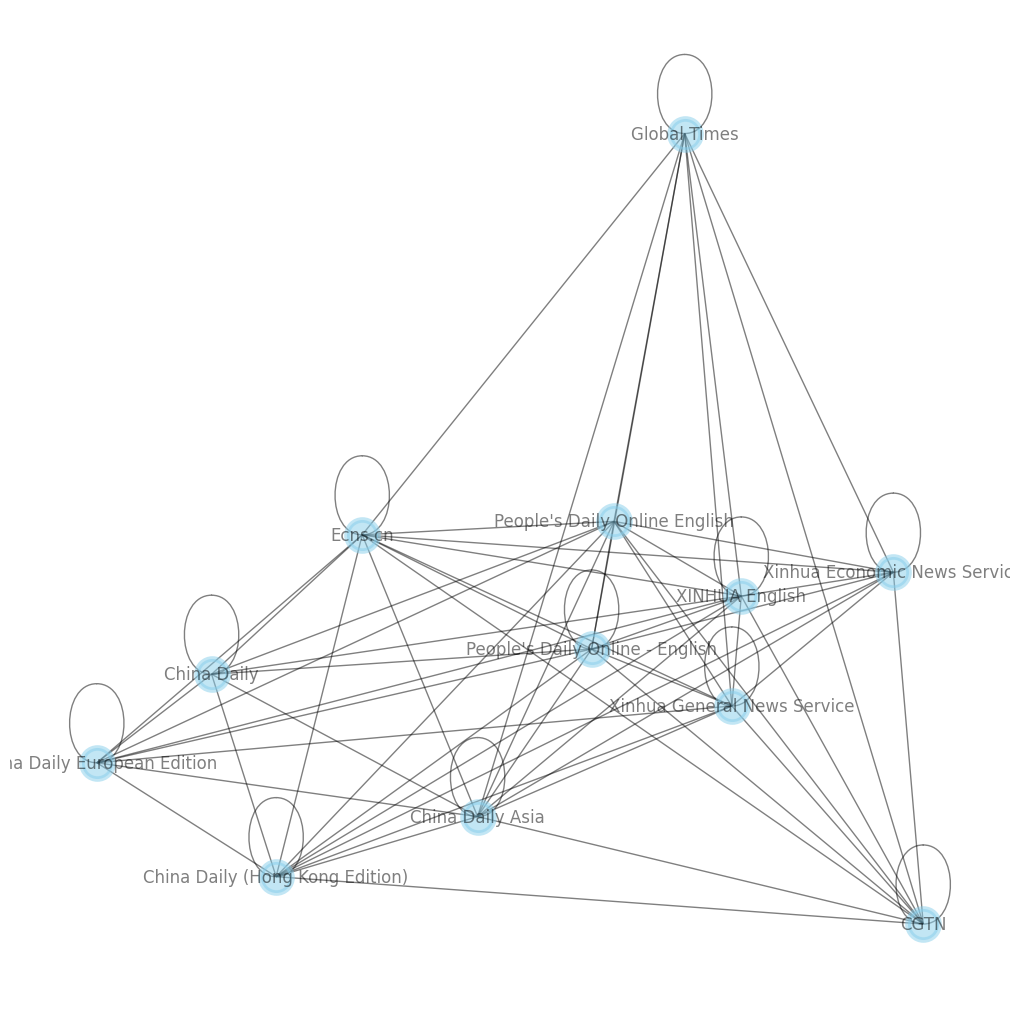

In [40]:
import networkx as nx
import matplotlib.pyplot as plt

def create_simplified_graph(df, min_degree):
    # Create the full graph
    G_full = create_graph(df)

    # Create an empty graph for the simplified version
    G_simplified = nx.Graph()

    # Iterate over the nodes in the full graph
    for node in G_full.nodes:
        # If the degree of the node is greater than min_degree, add it to the simplified graph
        if G_full.degree(node) > min_degree:
            for neighbor in G_full.neighbors(node):
                if G_full.degree(neighbor) > min_degree:
                    G_simplified.add_edge(node, neighbor, weight=G_full[node][neighbor]['weight'])

    return G_simplified

# Call the function with min_degree set to 10
G_simplified = create_simplified_graph(top_repeating_lists, 10)

# Draw the simplified graph
plt.figure(figsize=(10, 10))
pos = nx.spring_layout(G_simplified, seed=42)  # positions for all nodes
nx.draw(G_simplified, pos, with_labels=True, node_size=500, node_color="skyblue", node_shape="o", alpha=0.5, linewidths=4)
plt.show()

# Sentiment Analysis on Data
## Load all data

In this section, we will load all the data and perform sentiment analysis on it. We will use the `TextBlob` library to perform sentiment analysis. We will also use the `pandas` library to load the data and perform some basic data analysis.

In [62]:
df_control.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26350 entries, 0 to 26349
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   source_name       26350 non-null  object
 1   date              26350 non-null  object
 2   original_url      26350 non-null  object
 3   title             26350 non-null  object
 4   content           26350 non-null  object
 5   sentiment_scores  26350 non-null  object
dtypes: object(6)
memory usage: 1.2+ MB


In [63]:
import pandas as pd
import json
import numpy as np
import openai
from typing import Any
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Configuration for the OpenAI client
client = openai.OpenAI(
    base_url="https://api.fireworks.ai/inference/v1",
    api_key="EZZaHbmyatPZQYiFAt4A7ls2bUIOY436XqDWbXVXblSC9mkm",
)

def get_embedding(query: str) -> Any:
    """
    Retrieves the text embedding for a given query using a specified model from the OpenAI API.

    Args:
        query (str): The text input for which the embedding needs to be generated.

    Returns:
        Any: The embedding of the query as a list (usually a list of floats). The return type
        is kept generic (`Any`) as the structure depends on the model used and API response.
    """
    query_emb = client.embeddings.create(
        model="thenlper/gte-large",
        input=f"{query}"
    )
    return query_emb.data[0].embedding

# Example usage
if __name__ == "__main__":
    # Assuming you have a DataFrame named 'df_control' with a 'content' column containing the text data

    # Generate embeddings for the text data
    df_control['embedding'] = df_control['content'].apply(get_embedding)

    # Convert embeddings to a numpy array
    X = np.array(df_control['embedding'].tolist())

    # Determine the optimal number of clusters using the elbow method
    wcss = []
    for i in range(2, 11):
        kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
        kmeans.fit(X)
        wcss.append(kmeans.inertia_)

    # Plot the elbow curve
    plt.plot(range(2, 11), wcss)
    plt.title('Elbow Method')
    plt.xlabel('Number of Clusters')
    plt.ylabel('WCSS')
    plt.show()

    # Choose the optimal K value based on the elbow point
    optimal_k = 5  # Replace with the actual optimal K value

    # Perform clustering
    kmeans = KMeans(n_clusters=optimal_k, init='k-means++', max_iter=300, n_init=10, random_state=0)
    cluster_labels = kmeans.fit_predict(X)

    # Add cluster labels to the DataFrame
    df_control['cluster'] = cluster_labels

    # Extract topics from clusters
    for i in range(optimal_k):
        cluster_docs = df_control[df_control['cluster'] == i]
        cluster_terms = ' '.join(cluster_docs['content']).split()
        top_terms = pd.Series(cluster_terms).value_counts()[:10]
        print(f"Cluster {i} top terms:")
        print(top_terms)
        print()

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
